In [169]:
# Imports (numpy, pandas, scikit-learn, seaborn) for data processing and visuals
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data, dataset source available below
df = pd.read_csv("datasets/cdata.csv")

# Using Decision Trees & Random Forest to predict whether cancer is benign or malignant

### This dataset is available [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

The aim of this notebook is to predict whether a cancerous tumor is benign or malignant based on the size & texture of the tumor, via random tree and decision tree classifiers.

Information on the dataset is listed below, the bolded columns is the data utilized to make the prediction.

Column names and meanings:
* id: ID number
* ***diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)***
* ***radius_mean: mean of distances from center to points on the perimeter***
* ***texture_mean: standard deviation of gray-scale values***
* perimeter_mean: mean size of the core tumor
* area_mean: area of the tumor
* smoothness_mean: mean of local variation in radius lengths
* compactness_mean: mean of perimeter^2 / area - 1.0
* concavity_mean: mean of severity of concave portions of the contour
* concave_points_mean: mean for number of concave portions of the contour
* symmetry_mean
* fractal_dimension_mean: mean for "coastline approximation" - 1
* radius_se: standard error for the mean of distances from center to points on the perimeter
* texture_se: standard error for standard deviation of gray-scale values
* perimeter_se
* area_se
* smoothness_se: standard error for local variation in radius lengths
* compactness_se: standard error for perimeter^2 / area - 1.0
* concavity_se: standard error for severity of concave portions of the contour
* concave_points_se: standard error for number of concave portions of the contour
* symmetry_se
* fractal_dimension_se: standard error for "coastline approximation" - 1
* radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
* texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
* perimeter_worst
* area_worst
* smoothness_worst: "worst" or largest mean value for local variation in radius lengths
* compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
* concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
* concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
* symmetry_worst
* fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [170]:
# Preview of five rows listed
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [171]:
# Check if the data we will be using has any null data.
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**The columns (diagnosis, radius_mean, texture_mean) we are utilizing have no null/useless data.**

In [172]:
# Get a count of benign/malignant tumors
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

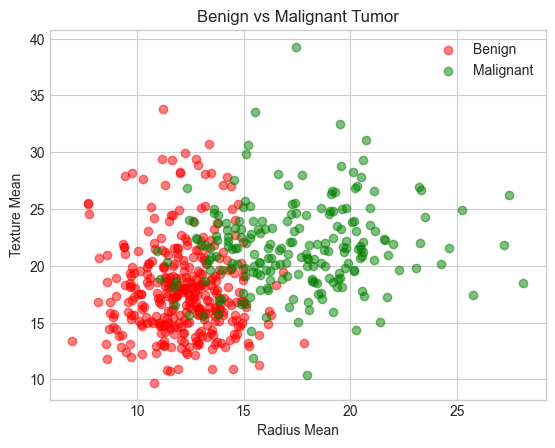

In [173]:
# Seperate the columns
benign_df = df[df.diagnosis == "B"]
malignant_df = df[df.diagnosis == "M"]

# Plot benign & malignant with radius mean and texture mean as axes
plt.title("Benign vs Malignant Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(benign_df.radius_mean, benign_df.texture_mean, color = "red", label = "Benign", alpha = 0.5)
plt.scatter(malignant_df.radius_mean, malignant_df.texture_mean, color = "green", label = "Malignant", alpha = 0.5)
plt.legend()
plt.show()

**A basic observation can be made that typically the larger the tumor is, the more likely it is to be malignant.**

In [174]:
# Prep the data for training
x = pd.DataFrame(df, columns=["radius_mean", "texture_mean"])
y = df["diagnosis"]

In [175]:
# Training data is unable to interpret strings (diagnosis column) therefore we encode the data as numbers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)
y[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

The first couple of rows in our dataset are malignant tumors therefore:

**0** = Benign

**1** = Malignant

In [176]:
# Train the data with a set random state (33).
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [177]:
# Establish our first model (decision tree).
model = DecisionTreeClassifier(random_state=33)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=33)

In [178]:
# Define our prediction
y_pred = model.predict(x_test)

In [179]:
# Generate accuracy and classification report (precision, recall, f1 score)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Accuracy: 0.8771929824561403
Classification Report:
               precision    recall  f1-score   support

      Benign       0.90      0.90      0.90       105
   Malignant       0.84      0.85      0.84        66

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



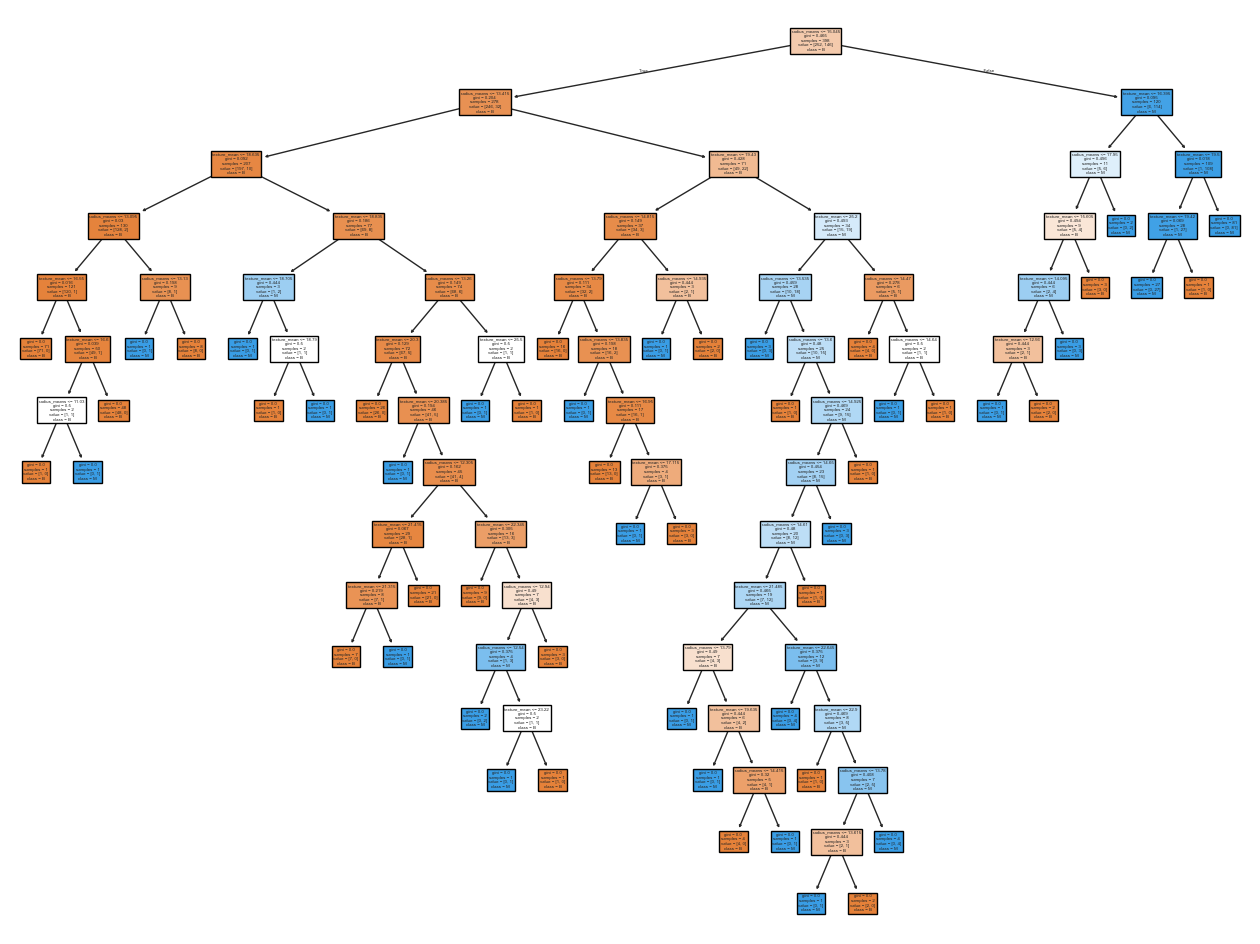

In [180]:
# Plot the decision tree, a more readable decision tree with a set max depth is later available
from sklearn.tree import export_text, plot_tree

plt.figure(figsize=(16,12))
plot_tree(model, feature_names=["radius_means", "texture_mean"], class_names=[str(clas) for clas in labelencoder.classes_], filled=True)
plt.show()

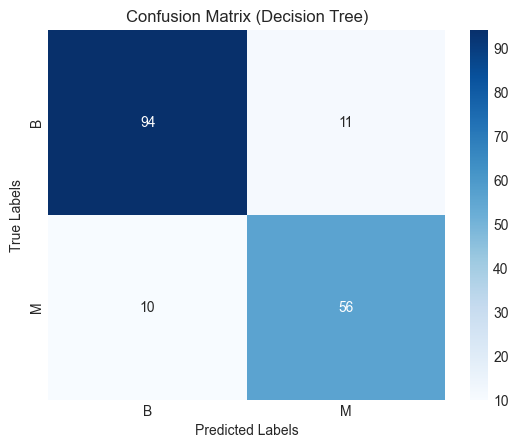

In [181]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_names=["B","M"] # B = Benign, M = Malignant

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [182]:
# Previous code is repeated for a decision tree with a max_depth of 3
model_maxthree = DecisionTreeClassifier(max_depth=3, random_state=33)
model_maxthree.fit(x_train, y_train)

y_pred = model_maxthree.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Accuracy: 0.9005847953216374
Classification Report:
               precision    recall  f1-score   support

      Benign       0.91      0.93      0.92       105
   Malignant       0.89      0.85      0.87        66

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



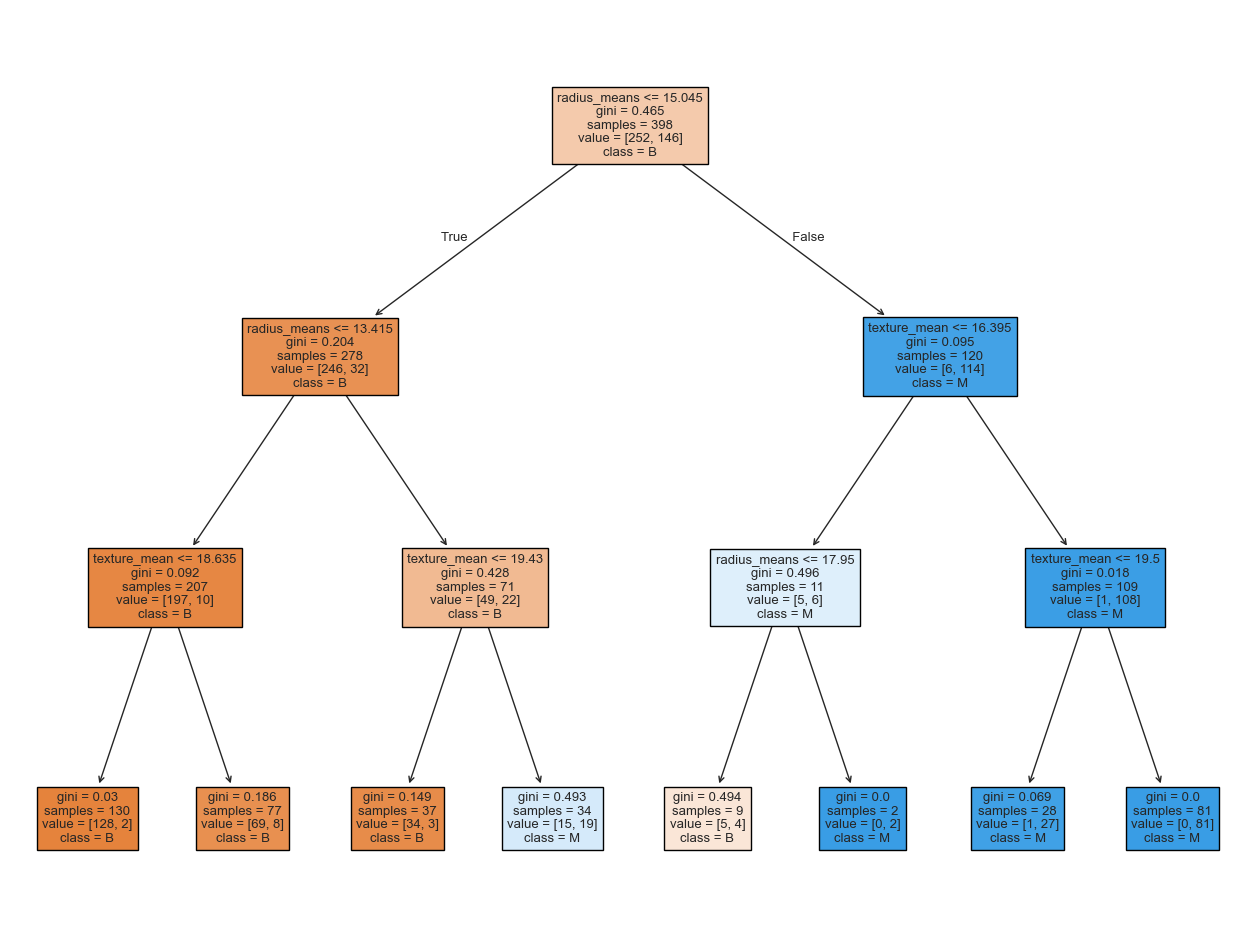

In [183]:
plt.figure(figsize=(16,12))
plot_tree(model_maxthree, feature_names=["radius_means", "texture_mean"], class_names=[str(clas) for clas in labelencoder.classes_], filled=True)
plt.show()

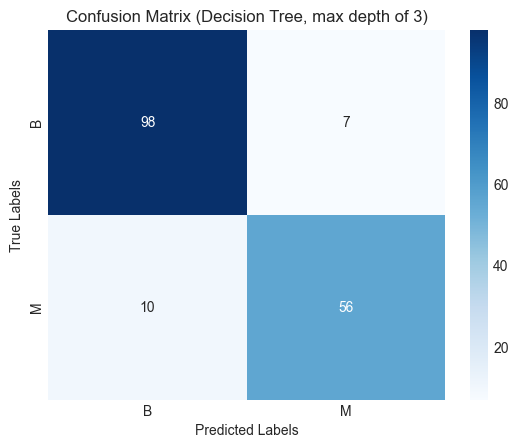

In [184]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree, max depth of 3)")
plt.show()

In [185]:
# Previous code is repeated for a random forest.
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=33)
forest_model.fit(x_train, y_train)

y_pred = forest_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

      Benign       0.91      0.92      0.92       105
   Malignant       0.88      0.85      0.86        66

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



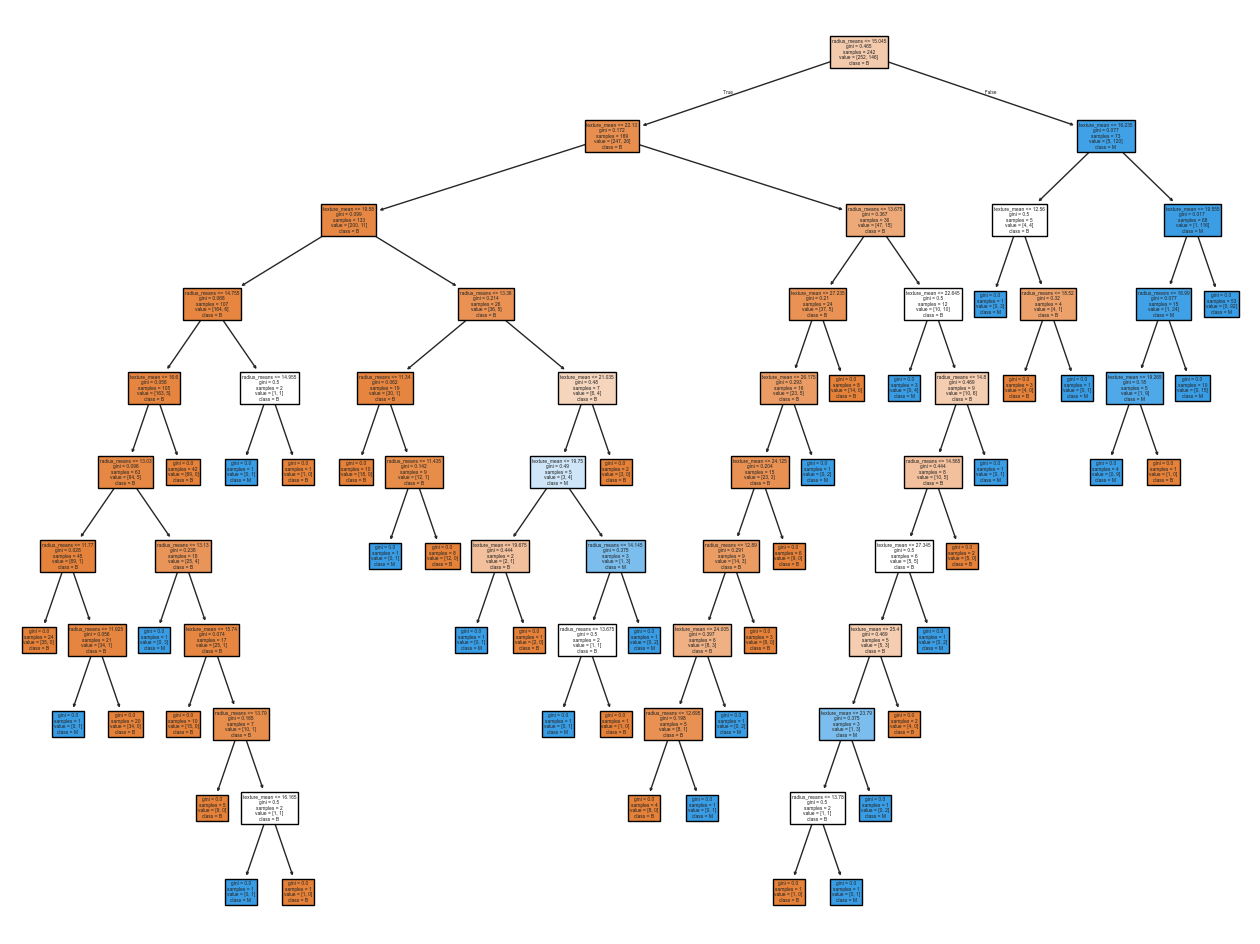

In [186]:
# We extract a decision tree from the random forest in order to visualize it.
individual_tree = forest_model.estimators_[0] # Any tree can be extracted, we just extracted the first one.

plt.figure(figsize=(16,12))
plot_tree(individual_tree, feature_names=["radius_means", "texture_mean"], class_names=[str(clas) for clas in labelencoder.classes_], filled=True)
plt.show()

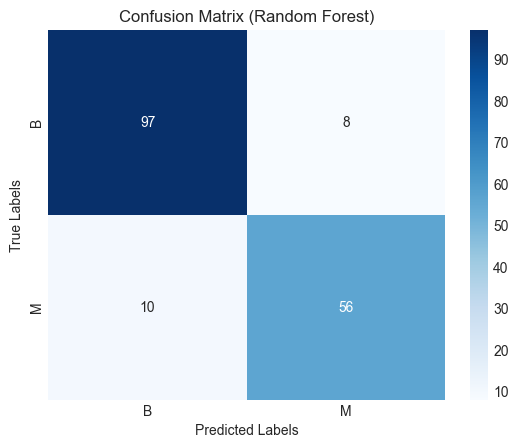

In [187]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()